# **Importing Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from google.colab import drive

import shap

In [ ]:
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/dl_assignment/HR_comma_sep.csv"


Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)

#**Desciptive Statistics**

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.Department.value_counts()

,count
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [ ]:
df.value_counts(subset=['Department', 'left'])

,,count
Department,left,
sales,0,3126
technical,0,2023
support,0,1674
sales,1,1014
IT,0,954
product_mng,0,704
technical,1,697
RandD,0,666
marketing,0,655


In [ ]:
df.value_counts(subset=['salary', 'left'])

salary  left
low     0       5144
medium  0       5129
low     1       2172
medium  1       1317
high    0       1155
        1         82
Name: count, dtype: int64

In [ ]:
df.value_counts(subset=['Department', 'salary'])

Department   salary
sales        low       2099
             medium    1772
technical    low       1372
             medium    1147
support      low       1146
             medium     942
IT           low        609
             medium     535
product_mng  low        451
marketing    low        402
product_mng  medium     383
marketing    medium     376
RandD        medium     372
             low        364
hr           medium     359
accounting   low        358
             medium     335
hr           low        335
sales        high       269
management   medium     225
             high       225
technical    high       201
management   low        180
support      high       141
IT           high        83
marketing    high        80
accounting   high        74
product_mng  high        68
RandD        high        51
hr           high        45
Name: count, dtype: int64

In [ ]:
df.value_counts(subset=['Work_accident', 'left'])

Work_accident  left
0              0       9428
               1       3402
1              0       2000
               1        169
Name: count, dtype: int64

In [ ]:
df.value_counts(subset=['promotion_last_5years', 'left'])

promotion_last_5years  left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
Name: count, dtype: int64

#**Data Visualization**

In [ ]:
cont_features = df.drop(columns=['salary','Department','Work_accident','left','promotion_last_5years'])
cat_features = df[['salary','Department','Work_accident','left','promotion_last_5years']]

<Axes: >

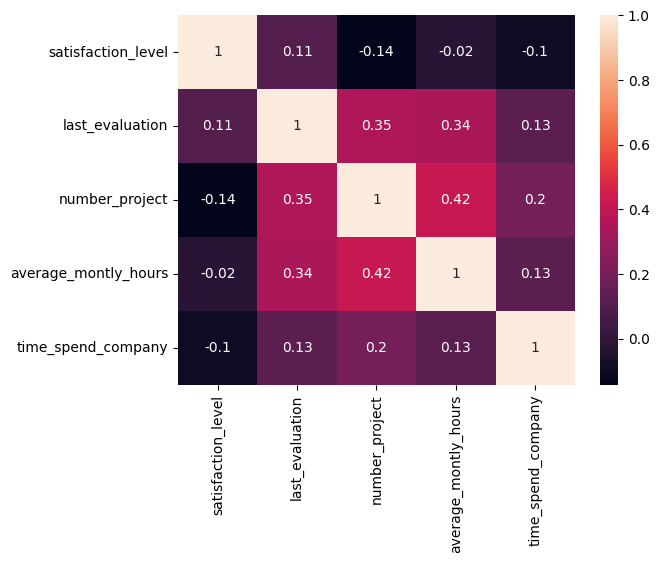

In [ ]:
corr_matrix = cont_features.corr()
sns.heatmap(corr_matrix, annot=True)

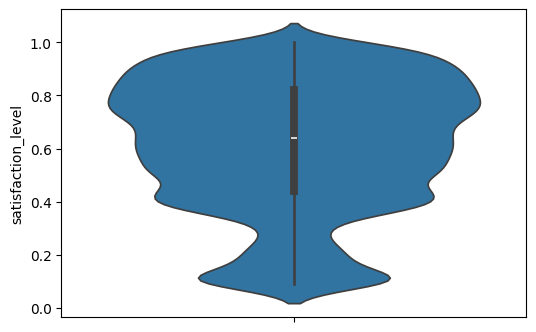

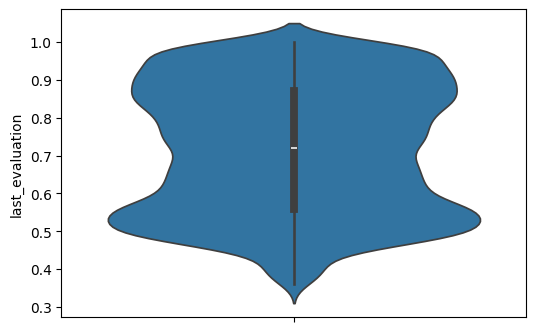

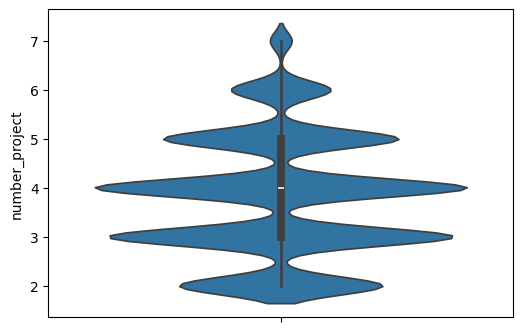

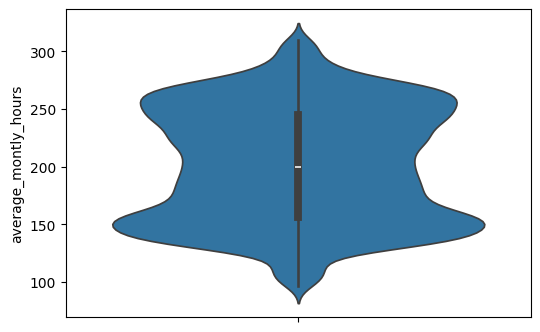

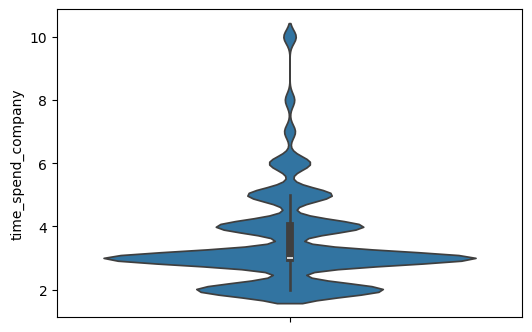

In [ ]:
for feature in cont_features.columns:
  plt.figure(figsize=(6,4))
  sns.violinplot(cont_features[feature])
  plt.show()

<ipython-input-17-e5c93b24fd0b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['left'], y=df['satisfaction_level'], ci=None)  # ci=None removes confidence intervals


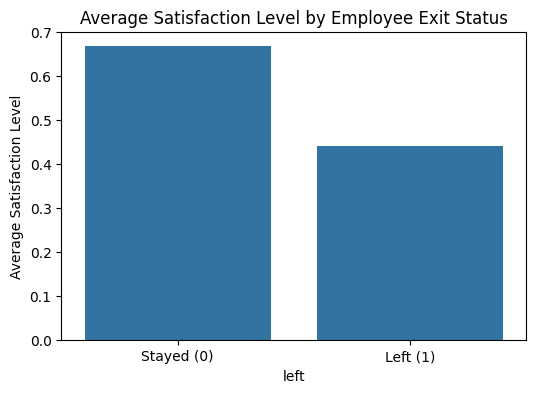

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['left'], y=df['satisfaction_level'], ci=None)  # ci=None removes confidence intervals
plt.xticks(ticks=[0, 1], labels=['Stayed (0)', 'Left (1)'])
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Employee Exit Status')
plt.show()

<ipython-input-18-a064c657ec61>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['left'], y=df['time_spend_company'], ci=None)  # ci=None removes confidence intervals


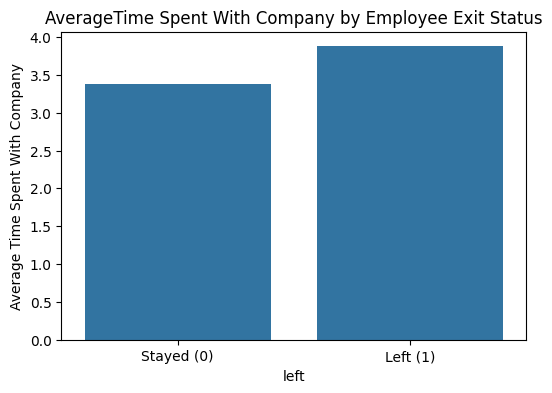

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['left'], y=df['time_spend_company'], ci=None)  # ci=None removes confidence intervals
plt.xticks(ticks=[0, 1], labels=['Stayed (0)', 'Left (1)'])
plt.ylabel('Average Time Spent With Company')
plt.title('AverageTime Spent With Company by Employee Exit Status')
plt.show()

<ipython-input-19-af0626fc89d0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['left'], y=df['average_montly_hours'], ci=None)  # ci=None removes confidence intervals


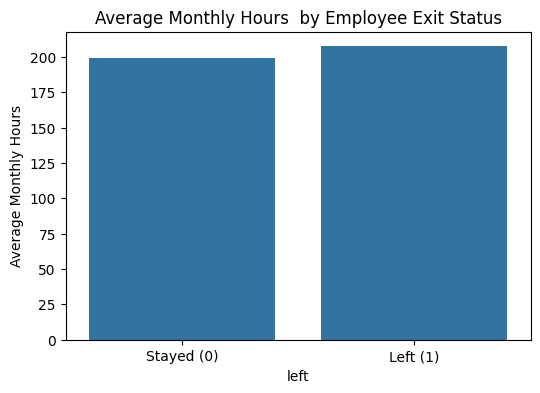

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['left'], y=df['average_montly_hours'], ci=None)  # ci=None removes confidence intervals
plt.xticks(ticks=[0, 1], labels=['Stayed (0)', 'Left (1)'])
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours  by Employee Exit Status')
plt.show()

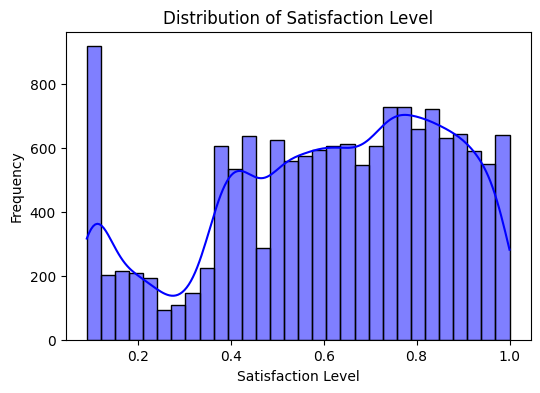

In [ ]:
# ✅ Histogram & KDE Plot for 'satisfaction_level'
plt.figure(figsize=(6, 4))
sns.histplot(df['satisfaction_level'], bins=30, kde=True, color='blue')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Level')
plt.show()

In [ ]:
print(df[(df['satisfaction_level'] >= 0) & (df['satisfaction_level'] <= .15)])

       satisfaction_level  last_evaluation  number_project  \
2                    0.11             0.88               7   
6                    0.10             0.77               6   
11                   0.11             0.81               6   
20                   0.11             0.83               6   
22                   0.09             0.95               6   
...                   ...              ...             ...   
14972                0.11             0.97               6   
14975                0.10             0.79               7   
14979                0.09             0.93               6   
14991                0.09             0.81               6   
14997                0.11             0.96               6   

       average_montly_hours  time_spend_company  Work_accident  left  \
2                       272                   4              0     1   
6                       247                   4              0     1   
11                      305            

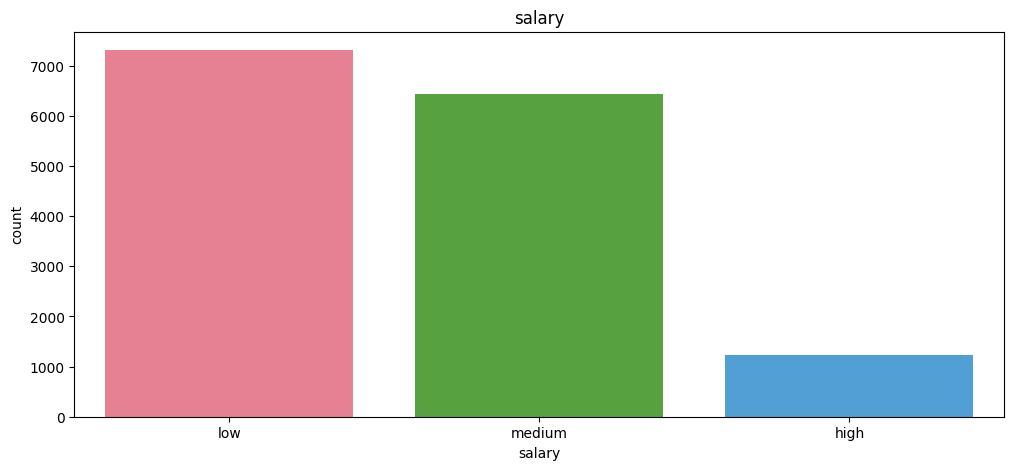

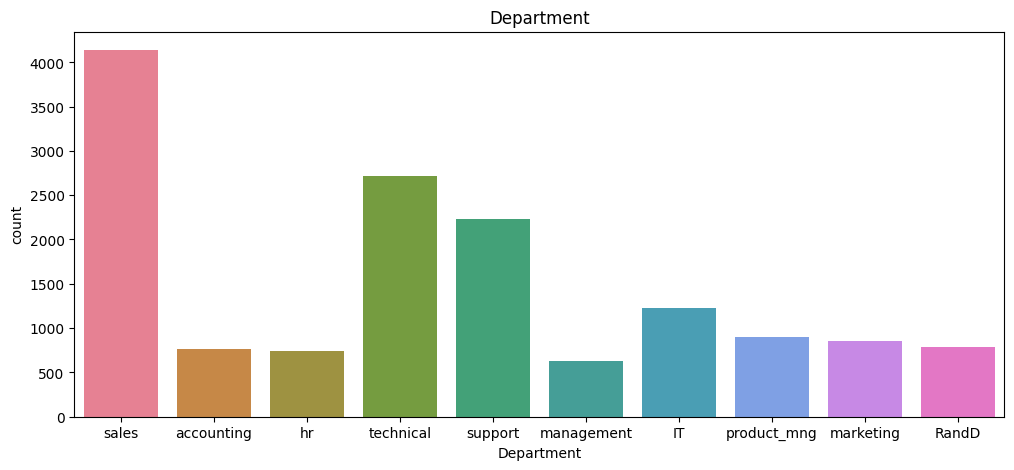

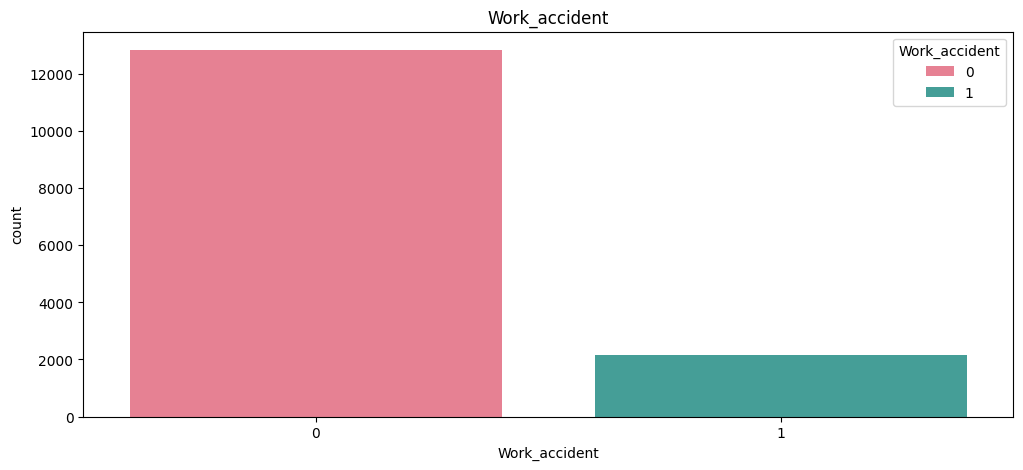

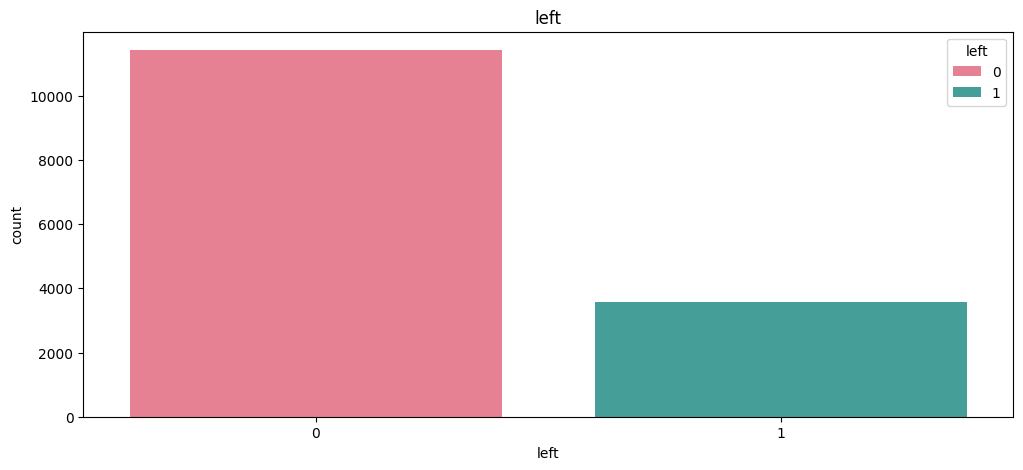

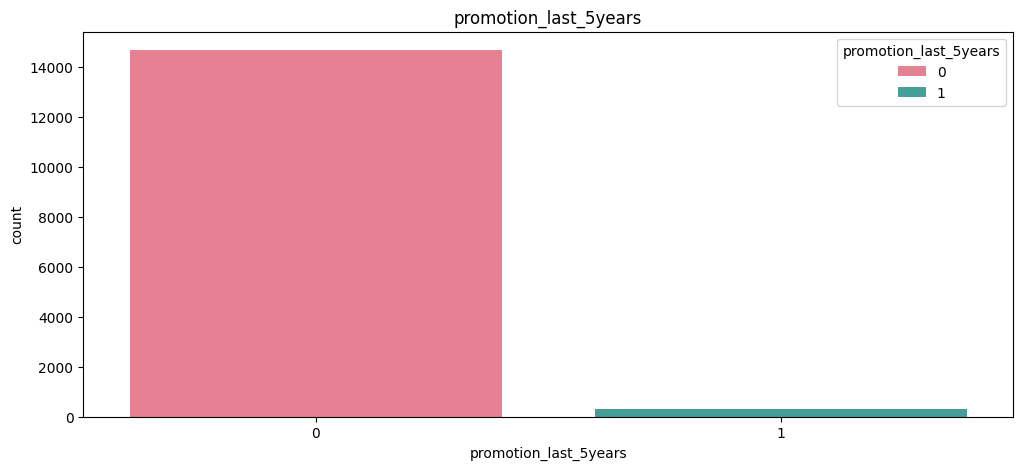

In [ ]:
for feature in cat_features.columns:
    plt.figure(figsize=(12, 5))
    plt.title(feature)
    sns.countplot(x=cat_features[feature], hue = cat_features[feature], palette="husl" )
    plt.show()

In [ ]:
print(df[df['salary'] == 'high'])

       satisfaction_level  last_evaluation  number_project  \
72                   0.45             0.49               2   
111                  0.09             0.85               6   
189                  0.44             0.51               2   
267                  0.45             0.53               2   
306                  0.37             0.46               2   
...                   ...              ...             ...   
14829                0.45             0.57               2   
14868                0.43             0.55               2   
14902                0.45             0.46               2   
14941                0.43             0.49               2   
14980                0.76             0.89               5   

       average_montly_hours  time_spend_company  Work_accident  left  \
72                      149                   3              0     1   
111                     289                   4              0     1   
189                     156            

#**Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
duplicate = df[df.duplicated()]
num_left_1 = duplicate[duplicate['left'] == 1].shape[0]
print(f"Number of duplicates where 'left' is 1: {num_left_1}")

Number of duplicates where 'left' is 1: 1580


Removing those duplicates who are non-churners to reduce class imbalance

In [ ]:
df = df[~(df.duplicated() & (df['left'] == 0))]

In [ ]:
df.shape

(13571, 10)

In [ ]:
# separate array into input and output components
X = df.drop(columns =['left'])
Y = df.left

## **Encoding Categorical Variables**

Label Encoding Salary as it is ordinal

In [ ]:
le = LabelEncoder()
X['salary'] = le.fit_transform(X['salary'])

One hot encoding the other categorical varuables

In [ ]:
# Define categorical features for encoding
categorical_features = ['Department', 'Work_accident', 'promotion_last_5years']

# Define ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
], remainder='passthrough')  # Keep other columns unchanged

# Fit the transformer on DataFrame X
ct.fit(X)

# Print feature names before converting to NumPy array
feature_names = ct.get_feature_names_out()
print("Feature Names After Encoding:", feature_names)


X = ct.transform(X)

Feature Names After Encoding: ['encoder__Department_IT' 'encoder__Department_RandD'
 'encoder__Department_accounting' 'encoder__Department_hr'
 'encoder__Department_management' 'encoder__Department_marketing'
 'encoder__Department_product_mng' 'encoder__Department_sales'
 'encoder__Department_support' 'encoder__Department_technical'
 'encoder__Work_accident_0' 'encoder__Work_accident_1'
 'encoder__promotion_last_5years_0' 'encoder__promotion_last_5years_1'
 'remainder__satisfaction_level' 'remainder__last_evaluation'
 'remainder__number_project' 'remainder__average_montly_hours'
 'remainder__time_spend_company' 'remainder__salary']


In [ ]:
print(X)

[[  0.   0.   0. ... 157.   3.   1.]
 [  0.   0.   0. ... 262.   6.   2.]
 [  0.   0.   0. ... 272.   4.   2.]
 ...
 [  0.   0.   0. ... 143.   3.   1.]
 [  0.   0.   0. ... 280.   4.   1.]
 [  0.   0.   0. ... 158.   3.   1.]]


In [ ]:
Y = np.array(Y)
print(Y)

[1 1 1 ... 1 1 1]


## **Splitting the dataset into the Training, Test, and Validation set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 13)

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **ANN Model**

In [ ]:
he_initializer = tf.keras.initializers.HeUniform()
gl_initializer = tf.keras.initializers.GlorotUniform()
class_weights = {0:1 , 1: 2.75}

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu', kernel_initializer=he_initializer))

In [ ]:
ann.add(tf.keras.layers.Dropout(rate=0.2))

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu', kernel_initializer=he_initializer))

In [ ]:
ann.add(tf.keras.layers.Dropout(rate=0.2))

In [ ]:
ann.add(tf.keras.layers.Dense(units=7, activation='relu', kernel_initializer=he_initializer))

In [ ]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu', kernel_initializer=he_initializer))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer=gl_initializer))

In [ ]:
ann.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),  # Adjust as needed
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model = ann.fit(X_train, y_train, batch_size = 25, class_weight=class_weights, epochs = 100 )

Epoch 1/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5928 - loss: 1.0951
Epoch 2/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6922 - loss: 0.8611
Epoch 3/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7650 - loss: 0.7345
Epoch 4/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8219 - loss: 0.6465
Epoch 5/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8446 - loss: 0.5963
Epoch 6/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8532 - loss: 0.5707
Epoch 7/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.5223
Epoch 8/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8788 - loss: 0.4813
Epoch 9/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8778 - loss: 0.4719
Epoch 10/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8970 - loss: 0.4392
Epoch 11/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8979 - loss: 0.4368
Epoch 12/100
435/435 ━━━━━━━━━━━━━━━━━━━━

<ipython-input-46-8e2b7c1f407f>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


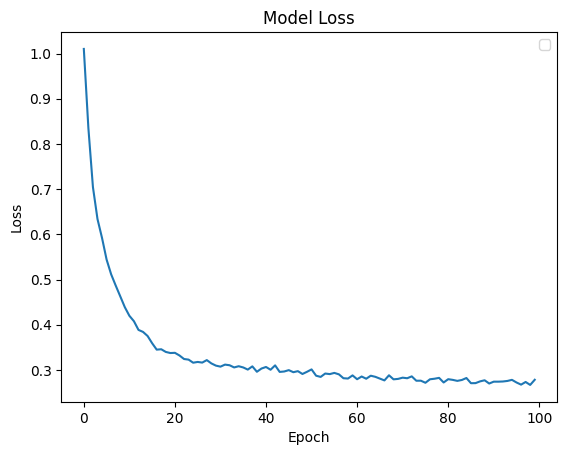

In [ ]:
plt.plot(model.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = ann.predict(X_test)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = (y_pred > 0.5)


In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

[[1989   39]
 [  55  632]]
0.965377532228361
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2028
           1       0.94      0.92      0.93       687

    accuracy                           0.97      2715
   macro avg       0.96      0.95      0.95      2715
weighted avg       0.97      0.97      0.97      2715



In [ ]:
# Ensure SHAP works with TensorFlow/Keras models
explainer = shap.Explainer(ann, X_train)  # Use trained model

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test)

PermutationExplainer explainer:  13%|█▎        | 352/2715 [00:41<06:17,  6.25it/s]


KeyboardInterrupt: 